# Level 3

## Task 2 : Votes Analysis

* Identify the restaurants with the highest and lowest number of votes.
* Analyze if there is a correlation between the number of votes and the rating of a restaurant.

### Loading necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [2]:
#loading the dataset from my Google Drive shared folder
url = "https://drive.google.com/uc?export=download&id=1dKZxapT3xLzOTOpy1LCyqctL8YEvzp4Y"
df = pd.read_csv(url)
#previewing first few rows of the dataset
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
# Checking the total number of rows and columns
df.shape

(9551, 21)

In [4]:
#checking the overall structure of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

### Identifying the restaurants with the highest and lowest number of votes

In [5]:
#filtering out rows with 0 votes
non_zero_votes = df[df['Votes'] > 0]

#finding restaurant wise count of votes
votes_count = non_zero_votes.groupby(non_zero_votes['Restaurant Name']).agg({'Votes':'sum'}).sort_values(by = "Votes" , ascending = False)

print(f'Restaurant with the highest number of votes : \n\n {votes_count.loc[votes_count.idxmax()]}')
print(f'\nRestaurant with the lowest number of votes : \n\n {votes_count.loc[votes_count.idxmin()]}')

Restaurant with the highest number of votes : 

                  Votes
Restaurant Name       
Barbeque Nation  28142

Restaurant with the lowest number of votes : 

                      Votes
Restaurant Name           
34 Park Street Lane      1


### Analyzing if there is a correlation between the number of votes and the rating of a restaurant

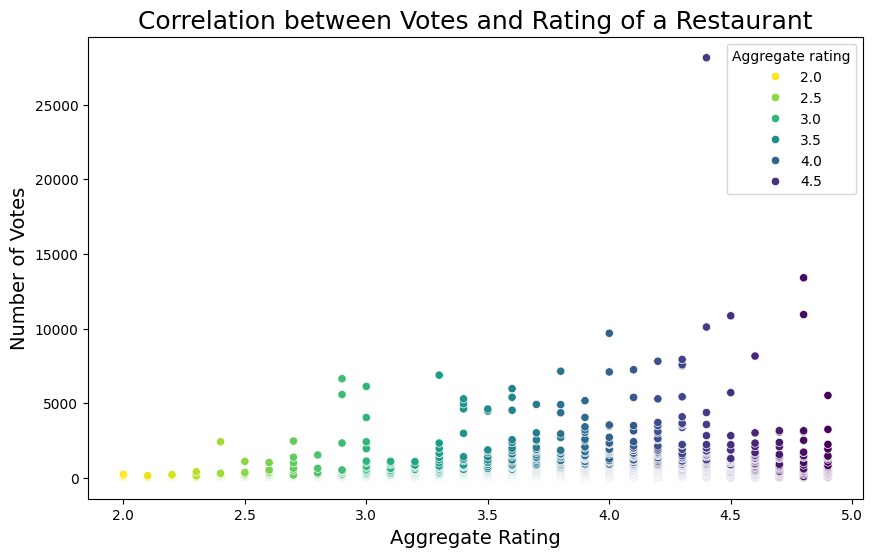

Correlation between Votes and Rating :  0.3


In [6]:
#filtering out rows with 0 votes and 0 ratings
filtered_data = df[(df['Votes'] != 0) & (df['Aggregate rating'] != 0)]

#finding restaurant wise count of votes and mean of aggregate ratings
votes_and_ratings = filtered_data.groupby(filtered_data['Restaurant Name']).agg({'Votes':'sum', 'Aggregate rating':'mean'}).sort_values(by = "Votes" , ascending = True)
votes_and_ratings['Aggregate rating'] = round(votes_and_ratings['Aggregate rating'],1)

#visualizing the correlation using Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x = votes_and_ratings['Aggregate rating'] , y = votes_and_ratings['Votes'] , hue = votes_and_ratings['Aggregate rating'], palette = "viridis_r" )
plt.xlabel("Aggregate Rating" , fontsize = 14)
plt.ylabel("Number of Votes" , fontsize = 14)
plt.title("Correlation between Votes and Rating of a Restaurant" , fontsize = 18)
plt.show()

#finding the correlation coefficient between number of votes and aggregate rating
correlation = votes_and_ratings['Votes'].corr(votes_and_ratings['Aggregate rating'])
print('Correlation between Votes and Rating : ', round(correlation,1))